In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from openqaoa.qaoa_parameters import QAOACircuitParams, create_qaoa_variational_params, Hamiltonian
from openqaoa.devices import create_device
from openqaoa.backends.qaoa_backend import get_qaoa_backend
from openqaoa.optimizers import get_optimizer
from openqaoa.utilities import *
from openqaoa.workflows.optimizer import QAOA, RQAOA
from openqaoa.problems.problem import QUBO, MaximumCut, MinimumVertexCover

### MaxCut

Graph edges [(0, 1), (0, 3), (0, 2), (1, 2), (1, 3), (2, 6), (3, 7), (7, 5), (7, 4), (4, 6), (4, 5), (6, 5)]

Graph edges after mapped to a MaxCut problem [(0, 1), (0, 3), (0, 2), (1, 2), (1, 3), (2, 6), (3, 4), (4, 7), (4, 5), (5, 6), (5, 7), (6, 7)]

QUBO terms [[0, 1], [0, 3], [0, 2], [1, 2], [1, 3], [2, 6], [3, 4], [4, 7], [4, 5], [5, 6], [5, 7], [6, 7]]

Hamiltonian from original graph 0.034*Z_{0} + 0.735*Z_{1} + 0.206*Z_{2} + 0.243*Z_{3} + 0.646*Z_{7} + 0.835*Z_{4} + 0.154*Z_{6} + 0.609*Z_{5} + 0.189*Z_{0}Z_{1} + 0.951*Z_{0}Z_{3} + 0.329*Z_{0}Z_{2} + 0.57*Z_{1}Z_{2} + 0.441*Z_{1}Z_{3} + 0.332*Z_{2}Z_{6} + 0.696*Z_{3}Z_{7} + 0.611*Z_{5}Z_{7} + 0.918*Z_{4}Z_{7} + 0.943*Z_{4}Z_{6} + 0.396*Z_{4}Z_{5} + 0.126*Z_{5}Z_{6} + 0

Hamiltonian from MaxCut graph 0.034*Z_{0} + 0.735*Z_{1} + 0.206*Z_{2} + 0.243*Z_{3} + 0.646*Z_{4} + 0.835*Z_{5} + 0.154*Z_{6} + 0.609*Z_{7} + 0.189*Z_{0}Z_{1} + 0.951*Z_{0}Z_{3} + 0.329*Z_{0}Z_{2} + 0.57*Z_{1}Z_{2} + 0.441*Z_{1}Z_{3} + 0.332*Z_{2}Z_{6} + 0.696*Z_{

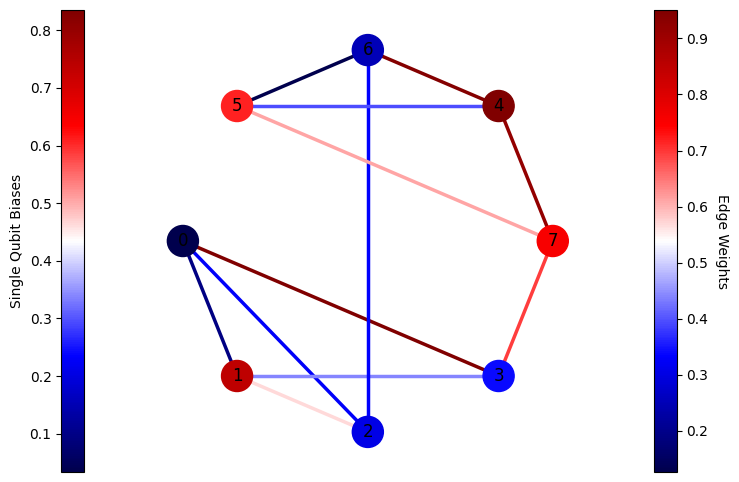

In [24]:
g = random_k_regular_graph(degree=3, nodes=range(8), weighted=True, biases=True)  # without biases the energy is the same, with is different
print('Graph edges', g.edges)
plot_graph(g)
#plt.savefig("graph_sigma={}.png".format(sigma))
#plt.clf()


# Define the MaxCut problem 
maxcut_prob = MaximumCut(g)

mapping = dict(zip(g, range(g.number_of_nodes())))

print("\nMapping is ", mapping)

print('\nGraph edges after mapped to a MaxCut problem', maxcut_prob._G.edges)

# Translate the problem into a binary QUBO
maxcut_qubo = maxcut_prob.get_qubo_problem()
print("\nQUBO terms", maxcut_qubo.terms)

# Define Hamiltonian
print('\nHamiltonian from original graph', hamiltonian_from_graph(g))
print('\nHamiltonian from MaxCut graph', hamiltonian_from_graph(maxcut_prob._G))
print('\nHamiltonian from QUBO. \nNote that here the single-qubit terms disappear. \nOnly this is relevant at the end', maxcut_qubo.hamiltonian)

# Energy and configuration of the qubo problem
energy_qubo, configuration_qubo = ground_state_hamiltonian(maxcut_qubo.hamiltonian)
print("\nAnalytically obtained ground state energy of the QUBO is {} for {} configuration".format(energy_qubo, configuration_qubo))


### Minimum Vertex Cover

In [ ]:
g = random_k_regular_graph(degree=3, nodes=range(6), weighted=False, biases=False)
plot_graph(g)
#plt.savefig("graph_sigma={}.png".format(sigma))
#plt.clf()

# Define te problem and translate it into a binary Qubo.

vc = MinimumVertexCover(G,field = field,penalty = penalty).get_qubo_problem()
print(vc.terms)

# Define Hamiltonian
cost_hamiltonian = hamiltonian_from_graph(g)
print(cost_hamiltonian)


# Solve the problem analytically
energy, configuration = ground_state_hamiltonian(cost_hamiltonian)
